<a href="https://colab.research.google.com/github/yasinsoylu1997/NLP-PROJELER-TOPLU/blob/main/Text_Sentiment_Analysis2_and_Glove.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import re
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
dataset = pd.read_csv('sample.csv')
data=dataset[["yildizSayisi","yorum"]]
data = data.sample(frac=1).reset_index(drop=True)
data=data[:10000]

In [3]:
dataset

,yildizSayisi,yorum,yorumLike
0,1,İlk ürünüm sorunsuz geldi lakin bunda prize ta...,0
1,1,Ürünü teslim aldığım günün ertesi iade için ka...,7
2,1,kesinlikle beğenmedim kullanmaya başladıktan 1...,2
3,1,Merhaba ürün elime ulaştı ama ürün bir çalışıy...,1
4,1,kargo hızlı o konuda haksızlık yapamam ama ürü...,2
...,...,...,...
49995,5,Çok güzel çok beğendim tafsiye ederim,0
49996,5,Vallahi çok işime yaradı. Aylarda öyle boşuna ...,0
49997,5,"olması gerektigi gibi , kenarda hazırda beklem...",0
49998,5,arçelik bulaşık makinesi için aldım servis olm...,0


In [4]:
dataset = pd.read_csv('sample.csv')
def sentiments(df):
  if df['yildizSayisi'] > 3.9:
    return 'Positive'
  elif df['yildizSayisi'] <= 3.0:
    return 'Negative'
data['sentiment'] = data.apply(sentiments, axis=1)

In [5]:
data

,yildizSayisi,yorum,sentiment
0,3,kargolama hızlıydı. ama radyo kalitesi iyi değ...,Negative
1,2,Modeli guzel ama kalitesi kotu. 1 haftadir kul...,Negative
2,5,kaliteli paketlenmiş gayet güzel kullanımıda,Positive
3,1,"Hafif dalgalı saçınız varsa, asla düzleştirmiy...",Negative
4,3,Bilmiyorum çok etkili değil sanırım,Negative
...,...,...,...
9995,3,Mükemmel şekil veriyor diyemem daha çok kurutm...,Negative
9996,4,gorsel olarakta işlevsel olarakta cok ideal bi...,Positive
9997,5,silverline cam ankastre tam oldu cok guzel,Positive
9998,1,Beğenmedim ayakları sağlam değil sallanıyor ür...,Negative


In [6]:
data["sentiment"].unique()

array(['Negative', 'Positive'], dtype=object)

In [7]:
data=data[["yorum","sentiment"]]

In [8]:
labeling = {
    'Positive':1, 
    'Negative':0
}

data['sentiment'] = data['sentiment'].apply(lambda x : labeling[x])
# Output first ten rows
data.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,yorum,sentiment
0,kargolama hızlıydı. ama radyo kalitesi iyi değ...,0
1,Modeli guzel ama kalitesi kotu. 1 haftadir kul...,0
2,kaliteli paketlenmiş gayet güzel kullanımıda,1
3,"Hafif dalgalı saçınız varsa, asla düzleştirmiy...",0
4,Bilmiyorum çok etkili değil sanırım,0
5,"Ürünün malzeme kalitesi berbat, telefonu takar...",0
6,Kargo hızlıydı ürün idare eder çok kırıyo tüyl...,0
7,Bosch marka ocağıma büyük geldi maalesef..,0
8,Ürün geldıgınde saglamdı ama cabuk bozuldu bel...,1
9,almanızı kesinlikle tavsiye etmem kökünden alm...,0


In [9]:
from sklearn.model_selection import train_test_split

train_df , valid_df  = train_test_split(data, test_size=0.2, random_state=42)

In [10]:
train_df , test_df   = train_test_split(train_df, test_size=0.2, random_state=42)

In [11]:
# Turnig all text to lowercase
train_df['yorum'] = train_df['yorum'].str.lower()
valid_df['yorum'] = valid_df['yorum'].str.lower()
test_df['yorum'] = test_df['yorum'].str.lower()
train_df.head()

,yorum,sentiment
2579,arkadaşlar kolay kolay bişeye yorum yapmam ama...,0
7128,saçlarım ileri derece yandı ve koltu düzleştir...,1
4082,çok çabuk bozuldu,0
2550,"hızlı teslimat, sıkıntısız süreç,güvenilir mag...",1
4926,cok hızlı ısınıyor suyu çabuk kaynatiyor ama c...,0


In [12]:
# Removing ponctuation
import string

exclude = set(string.punctuation) 

def remove_punctuation(x): 
    try: 
        x = ''.join(ch for ch in x if ch not in exclude) 
    except: 
        pass 
    return x 

train_df['yorum'] = train_df['yorum'].apply(remove_punctuation)
valid_df['yorum'] = valid_df['yorum'].apply(remove_punctuation)
test_df['yorum'] = test_df['yorum'].apply(remove_punctuation)
train_df.head()

,yorum,sentiment
2579,arkadaşlar kolay kolay bişeye yorum yapmam ama...,0
7128,saçlarım ileri derece yandı ve koltu düzleştir...,1
4082,çok çabuk bozuldu,0
2550,hızlı teslimat sıkıntısız süreçgüvenilir magaz...,1
4926,cok hızlı ısınıyor suyu çabuk kaynatiyor ama c...,0


In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# Removing stopwords
from nltk.corpus import stopwords

stop = stopwords.words('turkish')

train_df['yorum'] = train_df['yorum'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
valid_df['yorum'] = valid_df['yorum'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
test_df['yorum'] = test_df['yorum'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
train_df.head()

,yorum,sentiment
2579,arkadaşlar kolay kolay bişeye yorum yapmam ger...,0
7128,saçlarım ileri derece yandı koltu düzleştirici...,1
4082,çabuk bozuldu,0
2550,hızlı teslimat sıkıntısız süreçgüvenilir magaz...,1
4926,cok hızlı ısınıyor suyu çabuk kaynatiyor cok e...,0


# Classical Model with TF-IDF and SVM¶


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create feature vectors for every sentence
vectorizer = TfidfVectorizer(#min_df = 5,
                             #max_df = 0.8,
                             max_features = 20000,
                             sublinear_tf = True,
                             use_idf = True)#, stop_words='english')#vocabulary = list(embeddings_index.keys()

train_vectors = vectorizer.fit_transform(train_df['yorum'])
valid_vectors = vectorizer.transform(valid_df['yorum'])
test_vectors = vectorizer.transform(test_df['yorum'])

In [16]:
data

,yorum,sentiment
0,kargolama hızlıydı. ama radyo kalitesi iyi değ...,0
1,Modeli guzel ama kalitesi kotu. 1 haftadir kul...,0
2,kaliteli paketlenmiş gayet güzel kullanımıda,1
3,"Hafif dalgalı saçınız varsa, asla düzleştirmiy...",0
4,Bilmiyorum çok etkili değil sanırım,0
...,...,...
9995,Mükemmel şekil veriyor diyemem daha çok kurutm...,0
9996,gorsel olarakta işlevsel olarakta cok ideal bi...,1
9997,silverline cam ankastre tam oldu cok guzel,1
9998,Beğenmedim ayakları sağlam değil sallanıyor ür...,0


In [17]:
from sklearn import svm
# SVM
classifier_linear = svm.SVC(kernel='linear')
#Train
classifier_linear.fit(train_vectors, train_df['sentiment'])

SVC(kernel='linear')

In [18]:
from sklearn.metrics import classification_report

predictions = classifier_linear.predict(test_vectors)
# results
report = classification_report(test_df['sentiment'], predictions)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       995
           1       0.77      0.77      0.77       605

    accuracy                           0.82      1600
   macro avg       0.81      0.81      0.81      1600
weighted avg       0.82      0.82      0.82      1600



# Changing the classifier by a NN model¶


In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# Defining the NN model
model = Sequential()
model.add(Dense(20, input_shape=(train_vectors.shape[1],), activation='relu'))
model.add(Dropout(0.3))
#model.add(Dense(5, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
# compile network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
# Train
#Salvar o melhor modelo
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,verbose=1)
]

history = model.fit(
    train_vectors.toarray(), train_df['sentiment'], 
    epochs=20, 
    verbose=1,
    callbacks = callbacks_list,
    validation_data=(valid_vectors.toarray(), valid_df['sentiment']))

Epoch 1/20
197/200 [============================>.] - ETA: 0s - loss: 0.6301 - accuracy: 0.6761
Epoch 00001: val_loss improved from inf to 0.53900, saving model to model.h5
200/200 [==============================] - 2s 9ms/step - loss: 0.6288 - accuracy: 0.6777 - val_loss: 0.5390 - val_accuracy: 0.7950
Epoch 2/20
199/200 [============================>.] - ETA: 0s - loss: 0.4614 - accuracy: 0.8345
Epoch 00002: val_loss improved from 0.53900 to 0.43233, saving model to model.h5
200/200 [==============================] - 1s 7ms/step - loss: 0.4619 - accuracy: 0.8338 - val_loss: 0.4323 - val_accuracy: 0.8270
Epoch 3/20
199/200 [============================>.] - ETA: 0s - loss: 0.3468 - accuracy: 0.8923
Epoch 00003: val_loss improved from 0.43233 to 0.40085, saving model to model.h5
200/200 [==============================] - 2s 8ms/step - loss: 0.3467 - accuracy: 0.8922 - val_loss: 0.4008 - val_accuracy: 0.8295
Epoch 4/20
195/200 [============================>.] - ETA: 0s - loss: 0.2781 - a

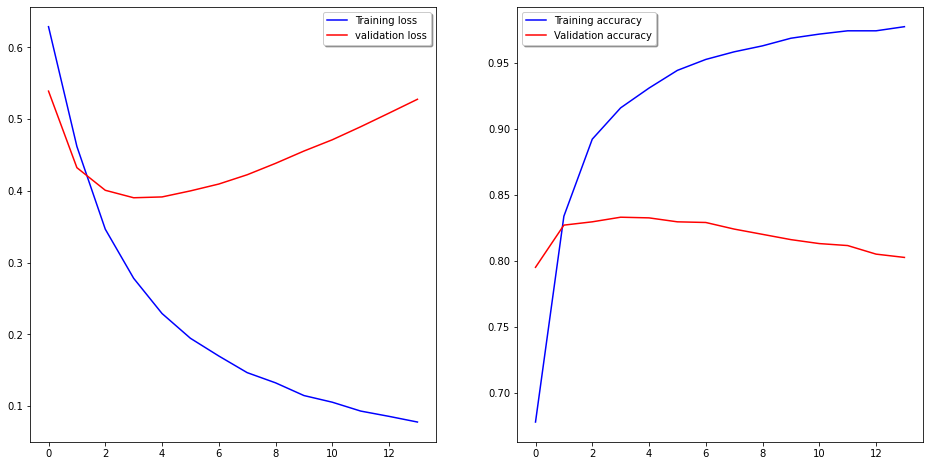

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [22]:
from tensorflow.keras.models import load_model
# Load the best saved model
model = load_model('model.h5')

y_pred = model.predict(valid_vectors.toarray())
y_pred = np.round(y_pred).astype(int)

print(classification_report(valid_df['sentiment'], y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1221
           1       0.82      0.74      0.77       779

    accuracy                           0.83      2000
   macro avg       0.83      0.82      0.82      2000
weighted avg       0.83      0.83      0.83      2000



#3. Sentences as stream of words¶


In [23]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import string

# Model constants.
max_features = 20000
embedding_dim = 100
sequence_length = 500

# function to stardardize texts
def custom_standardization(input_data):
    lowercase = tf.strings.lower(input_data)
    #stripped_html = tf.strings.regex_replace(lowercase, "<br />", " ")
    #return tf.strings.regex_replace(
    #    stripped_html, "[%s]" % re.escape(string.punctuation), ""
    #)
    return lowercase

# normalize, split, and map strings to integers
vectorize_layer = TextVectorization(
    #standardize=custom_standardization,
    max_tokens=max_features,
    output_mode="int",
    output_sequence_length=sequence_length,
)

# Creating the vocabulary
vectorize_layer.adapt(train_df['yorum'].values)

In [24]:
# Vetorizing all the texts
def vectorize_text(text):
    text = tf.expand_dims(text, -1)
    return vectorize_layer(text)


# Vectorize the data.
train_ds = vectorize_text(train_df['yorum'])
valid_ds = vectorize_text(valid_df['yorum'])
test_ds = vectorize_text(test_df[ 'yorum'])

In [25]:
print(train_ds[1])
print(vectorize_text(['ürünü yaklaşık 3 aydır kullanıyorum ergonomik tasarımı yüksek hassasiyeti süper bir mouse bir masadan parke zemine dusurmeme rağmen performansindan bir kaybetmedi yorumları okuduğunuzda göre ürünü satın almayı planlıyorsunuz kaçırmayın alın']))

tf.Tensor(
[  106  4931   348   600 10476   155    48  6922   261   206  6341 14252
   688   339   231    54   435    17   133   212   154   234  7375 12119
   157    80    50  2619  2146   325  5300   381  2045  1106     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0    

# A Convolutional Model

In [26]:
from keras import layers

model = Sequential()
# A integer input for vocab indices.
model.add(layers.Input(shape=(None,), dtype="int64"))
# Layer to map those vocab indices into a space of dimensionality 'embedding_dim'.
model.add(layers.Embedding(max_features, embedding_dim))
# Conv1D + global max pooling
model.add(layers.Conv1D(50, 7, padding="valid", activation="relu", strides=3))#200
#model.add(layers.Conv1D(100, 7, padding="valid", activation="relu", strides=3))
model.add(layers.GlobalMaxPooling1D())

# Common hidden layer for final classification
model.add(layers.Dense(10, activation="relu"))#100
model.add(layers.Dropout(0.5))
# Single unit output layer with sigmoid activation
model.add(layers.Dense(1, activation="sigmoid", name="predictions"))

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [27]:
# Train
#Salvar o melhor modelo
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,verbose=1)
]

history = model.fit(
    train_ds, train_df['sentiment'], 
    epochs=20, 
    verbose=1,
    callbacks = callbacks_list,
    validation_data=(valid_ds, valid_df['sentiment']))

Epoch 1/20
200/200 [==============================] - ETA: 0s - loss: 0.6136 - accuracy: 0.6598
Epoch 00001: val_loss improved from inf to 0.44557, saving model to model.h5
200/200 [==============================] - 17s 81ms/step - loss: 0.6136 - accuracy: 0.6598 - val_loss: 0.4456 - val_accuracy: 0.8125
Epoch 2/20
200/200 [==============================] - ETA: 0s - loss: 0.4231 - accuracy: 0.8484
Epoch 00002: val_loss improved from 0.44557 to 0.41515, saving model to model.h5
200/200 [==============================] - 16s 78ms/step - loss: 0.4231 - accuracy: 0.8484 - val_loss: 0.4151 - val_accuracy: 0.8225
Epoch 3/20
200/200 [==============================] - ETA: 0s - loss: 0.2801 - accuracy: 0.9144
Epoch 00003: val_loss did not improve from 0.41515
200/200 [==============================] - 16s 78ms/step - loss: 0.2801 - accuracy: 0.9144 - val_loss: 0.4627 - val_accuracy: 0.7970
Epoch 4/20
200/200 [==============================] - ETA: 0s - loss: 0.2139 - accuracy: 0.9417
Epoch 00

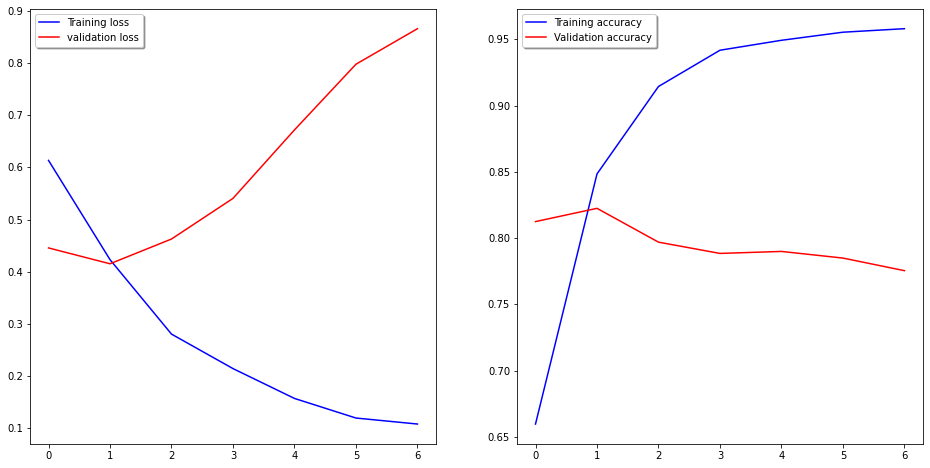

In [28]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [29]:
model = load_model('model.h5')

y_pred = model.predict(valid_vectors.toarray())
y_pred = np.round(y_pred).astype(int)

print(classification_report(valid_df['sentiment'], y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76      1221
           1       0.00      0.00      0.00       779

    accuracy                           0.61      2000
   macro avg       0.31      0.50      0.38      2000
weighted avg       0.37      0.61      0.46      2000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# A LSTM Recursive Model¶


In [30]:
model = Sequential()
# Input for variable-length sequences of integers
model.add(keras.Input(shape=(None,), dtype="int64"))
# Embed each integer in a embedding_dim vector
model.add(layers.Embedding(max_features, embedding_dim))
# Add 2 bidirectional LSTMs
#model.add(layers.Bidirectional(layers.LSTM(32, return_sequences=True)))
model.add(layers.Bidirectional(layers.LSTM(32)))
# Add a classifier
model.add(layers.Dense(1, activation="sigmoid"))

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [31]:
# Train
#Salvar o melhor modelo
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,verbose=1)
]

history = model.fit(
    train_ds, train_df['sentiment'], 
    epochs=20, 
    verbose=1,
    callbacks = callbacks_list,
    validation_data=(valid_ds, valid_df['sentiment']))

Epoch 1/20
200/200 [==============================] - ETA: 0s - loss: 0.5147 - accuracy: 0.7466
Epoch 00001: val_loss improved from inf to 0.42160, saving model to model.h5
200/200 [==============================] - 89s 428ms/step - loss: 0.5147 - accuracy: 0.7466 - val_loss: 0.4216 - val_accuracy: 0.8220
Epoch 2/20
200/200 [==============================] - ETA: 0s - loss: 0.2767 - accuracy: 0.8931
Epoch 00002: val_loss did not improve from 0.42160
200/200 [==============================] - 82s 409ms/step - loss: 0.2767 - accuracy: 0.8931 - val_loss: 0.4320 - val_accuracy: 0.8225
Epoch 3/20
200/200 [==============================] - ETA: 0s - loss: 0.1666 - accuracy: 0.9413
Epoch 00003: val_loss did not improve from 0.42160
200/200 [==============================] - 82s 408ms/step - loss: 0.1666 - accuracy: 0.9413 - val_loss: 0.4996 - val_accuracy: 0.8135
Epoch 4/20
200/200 [==============================] - ETA: 0s - loss: 0.1144 - accuracy: 0.9591
Epoch 00004: val_loss did not impro

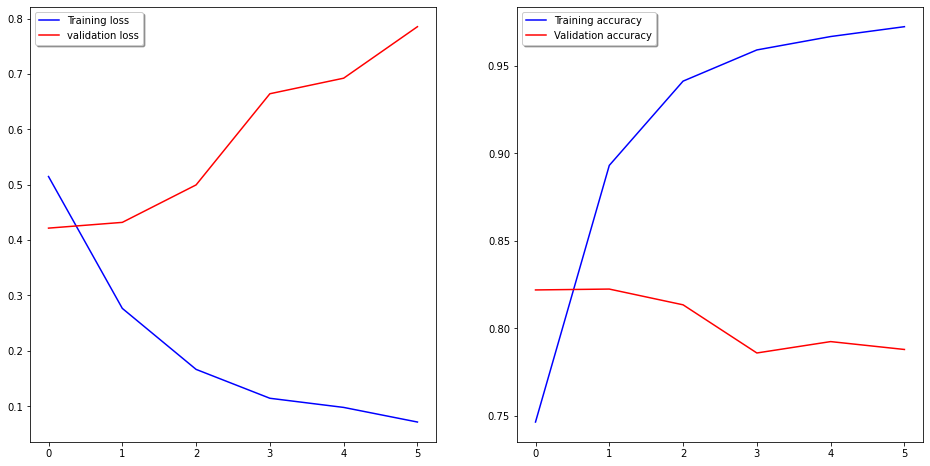

In [32]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [33]:
model = load_model('model.h5')

y_pred = model.predict(valid_vectors.toarray())
y_pred = np.round(y_pred).astype(int)

print(classification_report(valid_df['sentiment'], y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1221
           1       0.39      1.00      0.56       779

    accuracy                           0.39      2000
   macro avg       0.19      0.50      0.28      2000
weighted avg       0.15      0.39      0.22      2000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 4. Using Word Embeddings¶


In [34]:
voc = vectorize_layer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

In [35]:
word_index


{'': 0,
 '[UNK]': 1,
 'bir': 2,
 'ürün': 3,
 'güzel': 4,
 'iyi': 5,
 'geldi': 6,
 'değil': 7,
 'iade': 8,
 'gayet': 9,
 'aldım': 10,
 'tavsiye': 11,
 'fakat': 12,
 'biraz': 13,
 'ürünü': 14,
 'yok': 15,
 'cok': 16,
 'bi': 17,
 'memnun': 18,
 'hızlı': 19,
 'kaliteli': 20,
 'kadar': 21,
 'var': 22,
 'ederim': 23,
 'göre': 24,
 'ben': 25,
 'kargo': 26,
 'kullanışlı': 27,
 'olarak': 28,
 'sadece': 29,
 'oldu': 30,
 'sonra': 31,
 'kötü': 32,
 'tam': 33,
 'küçük': 34,
 'uygun': 35,
 '2': 36,
 'ettim': 37,
 'fazla': 38,
 '1': 39,
 'bile': 40,
 'ses': 41,
 'hemen': 42,
 'elime': 43,
 'uzun': 44,
 'ürünün': 45,
 'saç': 46,
 'ancak': 47,
 'kesinlikle': 48,
 'tek': 49,
 'beğendim': 50,
 'sorun': 51,
 'büyük': 52,
 'urun': 53,
 'ilk': 54,
 'gün': 55,
 'almayın': 56,
 'bozuldu': 57,
 'ince': 58,
 'şarj': 59,
 'ulaştı': 60,
 'şekilde': 61,
 'guzel': 62,
 'çabuk': 63,
 'teşekkürler': 64,
 'onun': 65,
 'beğenmedim': 66,
 'fiyatına': 67,
 'benim': 68,
 'yapıyor': 69,
 'olduğu': 70,
 'aynı': 71,
 'kalit

In [36]:
test = ["güzel",  "kargo", "para","berbat"]
[word_index[w] for w in test]

[4, 26, 243, 175]

# Glove Embeddings¶


In [37]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2021-12-10 01:54:20--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-12-10 01:54:20--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-12-10 01:54:20--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.2’

glove

In [38]:
!ls


glove.6B.100d.txt  glove.6B.50d.txt  glove.6B.zip.2  sample_data
glove.6B.200d.txt  glove.6B.zip      model.h5
glove.6B.300d.txt  glove.6B.zip.1    sample.csv


In [39]:
embeddings_index = {}
with open("glove.6B.100d.txt") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [40]:
embeddings_index["cat"]


array([ 0.23088  ,  0.28283  ,  0.6318   , -0.59411  , -0.58599  ,
        0.63255  ,  0.24402  , -0.14108  ,  0.060815 , -0.7898   ,
       -0.29102  ,  0.14287  ,  0.72274  ,  0.20428  ,  0.1407   ,
        0.98757  ,  0.52533  ,  0.097456 ,  0.8822   ,  0.51221  ,
        0.40204  ,  0.21169  , -0.013109 , -0.71616  ,  0.55387  ,
        1.1452   , -0.88044  , -0.50216  , -0.22814  ,  0.023885 ,
        0.1072   ,  0.083739 ,  0.55015  ,  0.58479  ,  0.75816  ,
        0.45706  , -0.28001  ,  0.25225  ,  0.68965  , -0.60972  ,
        0.19578  ,  0.044209 , -0.31136  , -0.68826  , -0.22721  ,
        0.46185  , -0.77162  ,  0.10208  ,  0.55636  ,  0.067417 ,
       -0.57207  ,  0.23735  ,  0.4717   ,  0.82765  , -0.29263  ,
       -1.3422   , -0.099277 ,  0.28139  ,  0.41604  ,  0.10583  ,
        0.62203  ,  0.89496  , -0.23446  ,  0.51349  ,  0.99379  ,
        1.1846   , -0.16364  ,  0.20653  ,  0.73854  ,  0.24059  ,
       -0.96473  ,  0.13481  , -0.0072484,  0.33016  , -0.1236

In [41]:
num_tokens = len(voc) + 2
#embedding_dim = 100
hits = 0
misses = 0

# Prepare embedding matrix to be used in a Embedding layer
# matrix where entry at index i is the pre-trained vector for the word of index i in our vectorizer's vocabulary
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 1228 words (14179 misses)


In [42]:
embeddings_index["guzel"]


array([ 0.5084   ,  0.505    , -0.081128 , -0.21552  ,  0.01673  ,
       -0.74883  , -0.037463 , -0.33809  ,  0.18696  ,  0.41353  ,
        0.51614  ,  0.32128  ,  0.020276 , -0.17554  , -0.095284 ,
        0.23546  , -0.54258  ,  0.43615  ,  0.28495  , -0.10936  ,
       -0.22726  ,  0.51345  , -0.12641  ,  1.0597   ,  0.18203  ,
        0.5659   ,  0.57652  ,  0.21145  ,  0.40707  , -0.12156  ,
        0.12677  , -0.29595  ,  0.39932  , -0.011487 , -0.099267 ,
       -0.34029  ,  0.35489  ,  0.17766  ,  0.055194 , -0.11279  ,
        0.45247  ,  0.16822  ,  0.88978  ,  0.049971 , -0.39325  ,
       -0.37352  ,  0.12689  ,  0.5073   ,  0.54952  ,  0.57672  ,
       -0.0089012, -0.41126  , -0.17227  , -0.20782  ,  0.12585  ,
        0.76335  ,  0.32022  , -0.1332   , -0.66609  , -0.56915  ,
        0.023227 , -0.33429  ,  1.1368   , -0.41956  ,  0.094599 ,
       -0.22115  , -0.072964 , -0.46117  , -0.47633  ,  0.2042   ,
        0.0048466,  0.15403  ,  0.30478  ,  0.87446  , -0.0300

In [43]:
word_index["guzel"]


62

In [44]:
embedding_matrix[216]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


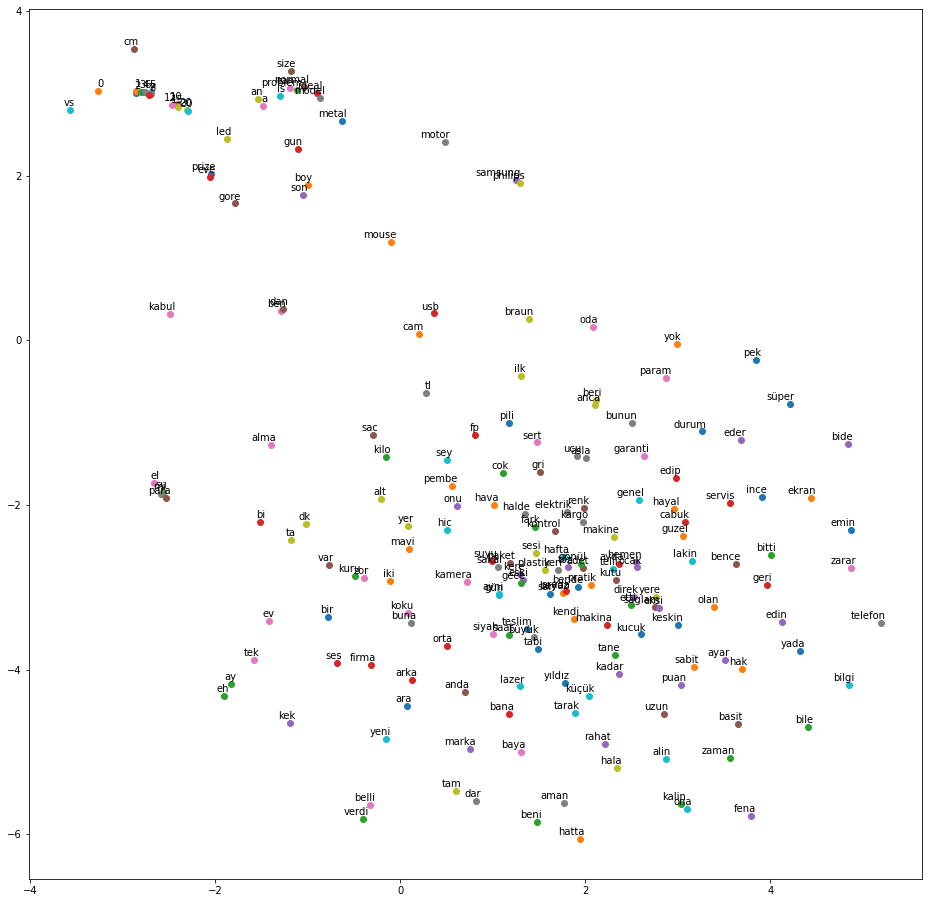

In [45]:
# Visualizing with T-SNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline


max_w = 1000
# Creates and TSNE model and plots it
labels = []
tokens = []
for word, i in word_index.items():
    if i == max_w:
        break
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        tokens.append(embedding_vector)
        labels.append(word)
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokens)
x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])
plt.figure(figsize=(16, 16))
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
        xy=(x[i], y[i]),
        xytext=(5, 2),
        textcoords='offset points',
        ha='right',
        va='bottom')
plt.show()

In [46]:
# load the pre-trained word embeddings matrix into an Embedding layer. trainable = False
embedding_layer = layers.Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
)

In [47]:
model = Sequential()
# Input for variable-length sequences of integers
model.add(keras.Input(shape=(None,), dtype="int64"))
# load the pre-trained word embeddings matrix into an Embedding layer. trainable = False
model.add(layers.Embedding(num_tokens,embedding_dim, embeddings_initializer=keras.initializers.Constant(embedding_matrix), trainable=False))
# Add 2 bidirectional LSTMs
model.add(layers.Bidirectional(layers.LSTM(32, return_sequences=True)))
model.add(layers.Bidirectional(layers.LSTM(32)))
# Add a classifier
model.add(layers.Dense(1, activation="sigmoid"))

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [48]:
# Train
#Salvar o melhor modelo
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,verbose=1)
]

history = model.fit(
    train_ds, train_df['sentiment'], 
    epochs=5, 
    verbose=1,
    callbacks = callbacks_list,
    validation_data=(valid_ds, valid_df['sentiment']))

Epoch 1/5
200/200 [==============================] - ETA: 0s - loss: 0.6594 - accuracy: 0.6078
Epoch 00001: val_loss improved from inf to 0.63240, saving model to model.h5
200/200 [==============================] - 134s 643ms/step - loss: 0.6594 - accuracy: 0.6078 - val_loss: 0.6324 - val_accuracy: 0.6210
Epoch 2/5
200/200 [==============================] - ETA: 0s - loss: 0.6349 - accuracy: 0.6275
Epoch 00002: val_loss improved from 0.63240 to 0.62333, saving model to model.h5
200/200 [==============================] - 127s 637ms/step - loss: 0.6349 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6460
Epoch 3/5
200/200 [==============================] - ETA: 0s - loss: 0.6213 - accuracy: 0.6384
Epoch 00003: val_loss improved from 0.62333 to 0.61457, saving model to model.h5
200/200 [==============================] - 129s 643ms/step - loss: 0.6213 - accuracy: 0.6384 - val_loss: 0.6146 - val_accuracy: 0.6540
Epoch 4/5
200/200 [==============================] - ETA: 0s - loss: 0.

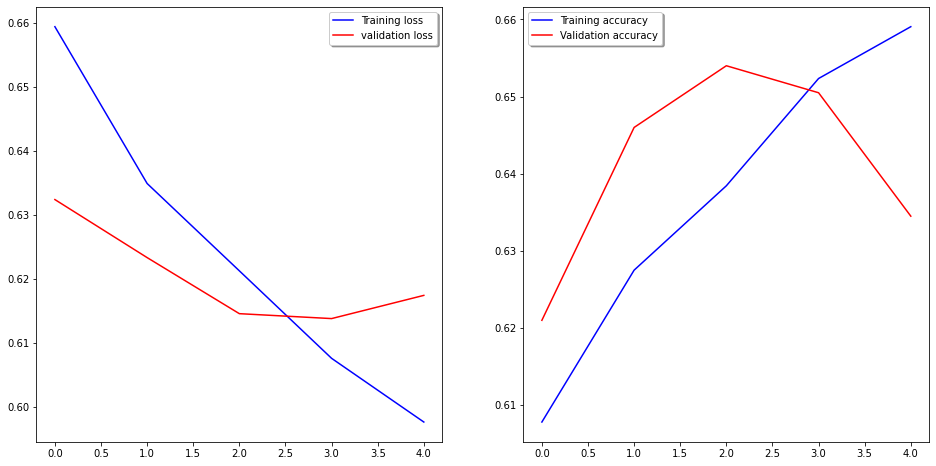

In [49]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [50]:
model = load_model('model.h5')

y_pred = model.predict(test_ds)
y_pred = [1 if x >=0.5 else 0 for x in y_pred]
print(classification_report(test_df['sentiment'], y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.65      0.89      0.75       995
           1       0.54      0.21      0.30       605

    accuracy                           0.63      1600
   macro avg       0.59      0.55      0.52      1600
weighted avg       0.61      0.63      0.58      1600



# Using a Transformer¶


In [51]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1, name=None, **kwargs):
        super(TransformerBlock, self).__init__(name=name)
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.ff_dim = ff_dim
        self.rate = rate
        super(TransformerBlock, self).__init__(**kwargs)
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)
    
    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'embed_dim': self.embed_dim,
            'num_heads': self.num_heads,
            'ff_dim': self.ff_dim,
            'rate': self.rate,
        })
        return config

In [52]:
#Two seperate embedding layers, one for tokens, one for token index (positions).
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim, name=None, **kwargs):
        super(TokenAndPositionEmbedding, self).__init__(name=name)
        self.maxlen = maxlen
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim
        super(TokenAndPositionEmbedding, self).__init__(**kwargs)
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions
    
    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'maxlen': self.maxlen,
            'vocab_size': self.vocab_size,
            'embed_dim': self.embed_dim
        })
        return config

In [53]:
import keras
import keras.utils
from keras import utils as np_utils
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import InputLayer
from tensorflow.keras import layers 
import keras.backend as K
from keras.layers import LSTM, Input



In [54]:
max_features = 20000
embedding_dim = 100
sequence_length = 500

embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

inputs = layers.Input(shape=(sequence_length,))
embedding_layer = TokenAndPositionEmbedding(sequence_length, max_features, embedding_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embedding_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)
#model.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [55]:
# Train
#Salvar o melhor modelo
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,verbose=1)
]

history = model.fit(
    train_ds, train_df['sentiment'], 
    epochs=10, 
    verbose=1,
    callbacks = callbacks_list,
    validation_data=(valid_ds, valid_df['sentiment'])
)

Epoch 1/10
200/200 [==============================] - ETA: 0s - loss: 0.6766 - accuracy: 0.6000
Epoch 00001: val_loss improved from inf to 0.67154, saving model to model.h5
200/200 [==============================] - 224s 1s/step - loss: 0.6766 - accuracy: 0.6000 - val_loss: 0.6715 - val_accuracy: 0.6105
Epoch 2/10
200/200 [==============================] - ETA: 0s - loss: 0.6698 - accuracy: 0.6048
Epoch 00002: val_loss improved from 0.67154 to 0.67002, saving model to model.h5
200/200 [==============================] - 225s 1s/step - loss: 0.6698 - accuracy: 0.6048 - val_loss: 0.6700 - val_accuracy: 0.6105
Epoch 3/10
200/200 [==============================] - ETA: 0s - loss: 0.4644 - accuracy: 0.7756
Epoch 00003: val_loss improved from 0.67002 to 0.41288, saving model to model.h5
200/200 [==============================] - 219s 1s/step - loss: 0.4644 - accuracy: 0.7756 - val_loss: 0.4129 - val_accuracy: 0.8180
Epoch 4/10
200/200 [==============================] - ETA: 0s - loss: 0.2564 

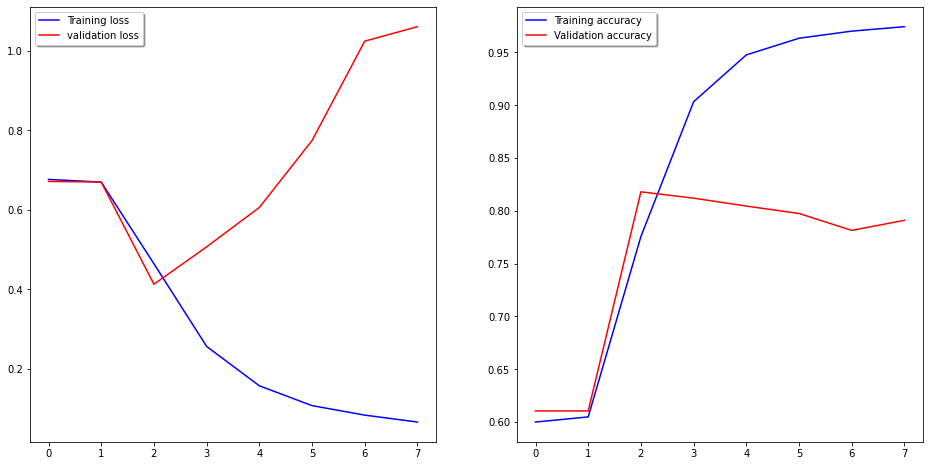

In [56]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [57]:
model = load_model('model.h5', custom_objects={'TokenAndPositionEmbedding': TokenAndPositionEmbedding, 'TransformerBlock': TransformerBlock })

y_pred = model.predict(test_ds)
y_pred = [1 if x >=0.5 else 0 for x in y_pred]
print(classification_report(test_df['sentiment'], y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85       995
           1       0.73      0.82      0.77       605

    accuracy                           0.82      1600
   macro avg       0.80      0.82      0.81      1600
weighted avg       0.82      0.82      0.82      1600

